<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Outliers-Evaluation:" data-toc-modified-id="Outliers-Evaluation:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Outliers Evaluation:</a></span><ul class="toc-item"><li><span><a href="#Evaluation-of-outliers-based-on-fire-duration-and-affected-area,-filtration,-and-selection-of-subsample." data-toc-modified-id="Evaluation-of-outliers-based-on-fire-duration-and-affected-area,-filtration,-and-selection-of-subsample.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Evaluation of outliers based on fire duration and affected area, filtration, and selection of subsample.</a></span></li><li><span><a href="#Manual-evaluation-of-the-variable-&quot;area,&quot;-checking-for-more-evident-outliers:" data-toc-modified-id="Manual-evaluation-of-the-variable-&quot;area,&quot;-checking-for-more-evident-outliers:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Manual evaluation of the variable "area," checking for more evident outliers:</a></span></li><li><span><a href="#Manual-evaluation-of-the-variable-&quot;control-time,&quot;-checking-for-more-evident-outliers:" data-toc-modified-id="Manual-evaluation-of-the-variable-&quot;control-time,&quot;-checking-for-more-evident-outliers:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Manual evaluation of the variable "control time," checking for more evident outliers:</a></span></li><li><span><a href="#Manual-evaluation-of-the-variable-&quot;extinguishing-time,&quot;-checking-for-more-evident-outliers:" data-toc-modified-id="Manual-evaluation-of-the-variable-&quot;extinguishing-time,&quot;-checking-for-more-evident-outliers:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Manual evaluation of the variable "extinguishing time," checking for more evident outliers:</a></span></li><li><span><a href="#Manual-evaluation-of-the-variable-&quot;resources,&quot;-checking-for-more-evident-outliers:" data-toc-modified-id="Manual-evaluation-of-the-variable-&quot;resources,&quot;-checking-for-more-evident-outliers:-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Manual evaluation of the variable "resources," checking for more evident outliers:</a></span></li></ul></li><li><span><a href="#Feature-Engineer" data-toc-modified-id="Feature-Engineer-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Engineer</a></span></li><li><span><a href="#Saving-data" data-toc-modified-id="Saving-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Saving data</a></span></li></ul></div>

In [1]:
import os 
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
data_path = '../Data'
fires_path = 'generated_files/fires_filt_preliminar.csv'
df_fires = pd.read_csv(os.path.join(data_path, fires_path), index_col = 0)

## Outliers Evaluation:

### Evaluation of outliers based on fire duration and affected area, filtration, and selection of subsample.

As we already observed in the notebook ***1_Problem statement, original dataset evaluation and initial filtering***, regardless of the fire duration, the variable "affected area" always has a significant number of outliers. Another strategy we can consider is to evaluate how the causes (our target variable) are distributed across the fire duration to assess the best possible approach: removing a time segment, data transformation, or creating a separate model that can be applied to the outliers if the population defining them is sufficiently large.

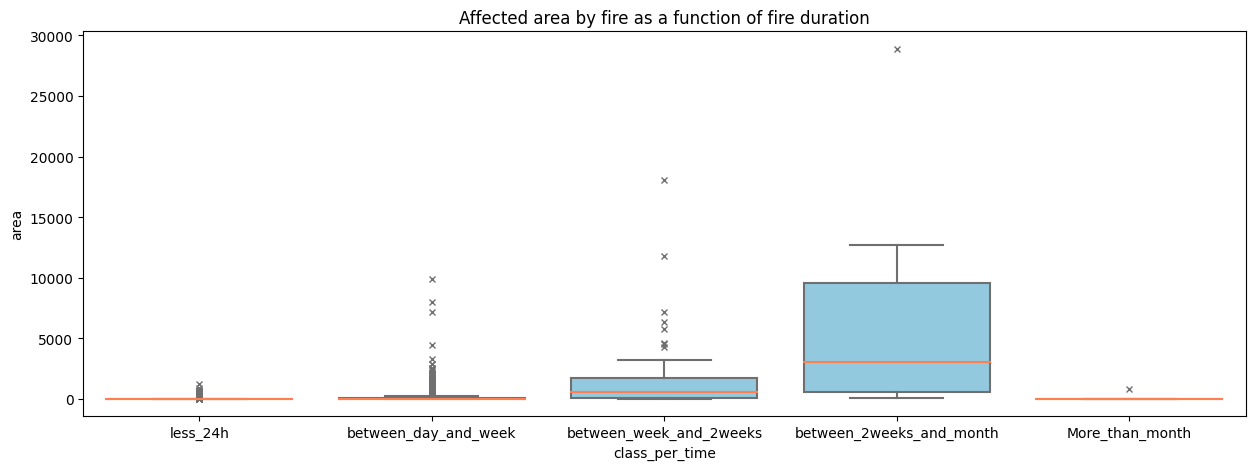

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x = 'class_per_time', y = 'superficie',data = df_fires, ax = ax, color = 'skyblue',
            flierprops={"marker": "x"},medianprops={"color": "coral"})
ax.set_title('Affected area by fire as a function of fire duration')
ax.set_ylabel('area')
plt.show()

In [12]:
def cause_per_year(df, field, count = False):
    if count:
        return df[field].value_counts().sort_index()
    return (df[field].value_counts().sort_index() / df.shape[0])*100


print('Proportion of observations as a function of fire duration.')
cause_per_year(df_fires, 'class_per_time')

Proportion of observations as a function of fire duration.


More_than_month              0.025966
between_2weeks_and_month     0.077898
between_day_and_week        10.105941
between_week_and_2weeks      0.327171
less_24h                    89.457831
Name: class_per_time, dtype: float64

Considering that 99% of the data refers to fires lasting less than 24 hours (89%) and fires lasting more than one day and one week (10%), and the effect of outliers is evident within this subset, for the purposes of this exercise, we will solely utilize this data in the remaining procedures (preprocessing, training, and validation). Consequently, the model will be confined to a one-week duration range, and conclusions cannot be extrapolated to fires exceeding this duration (this could be addressed with another model). On the other hand, although the selected duration ranges for model development encompass the majority of outliers, the most extreme values fall within the time segments that we will not use in the analysis, simplifying data handling (fewer *'unusual'* values to deal with).

In [14]:
time_lapse = ['less_24h', 'between_day_and_week']
new_data = df_fires[df_fires['class_per_time'].isin(time_lapse)]

The variables of interest to evaluate in this context are the numerical variables (area, control time, extinguishing time, and resources).

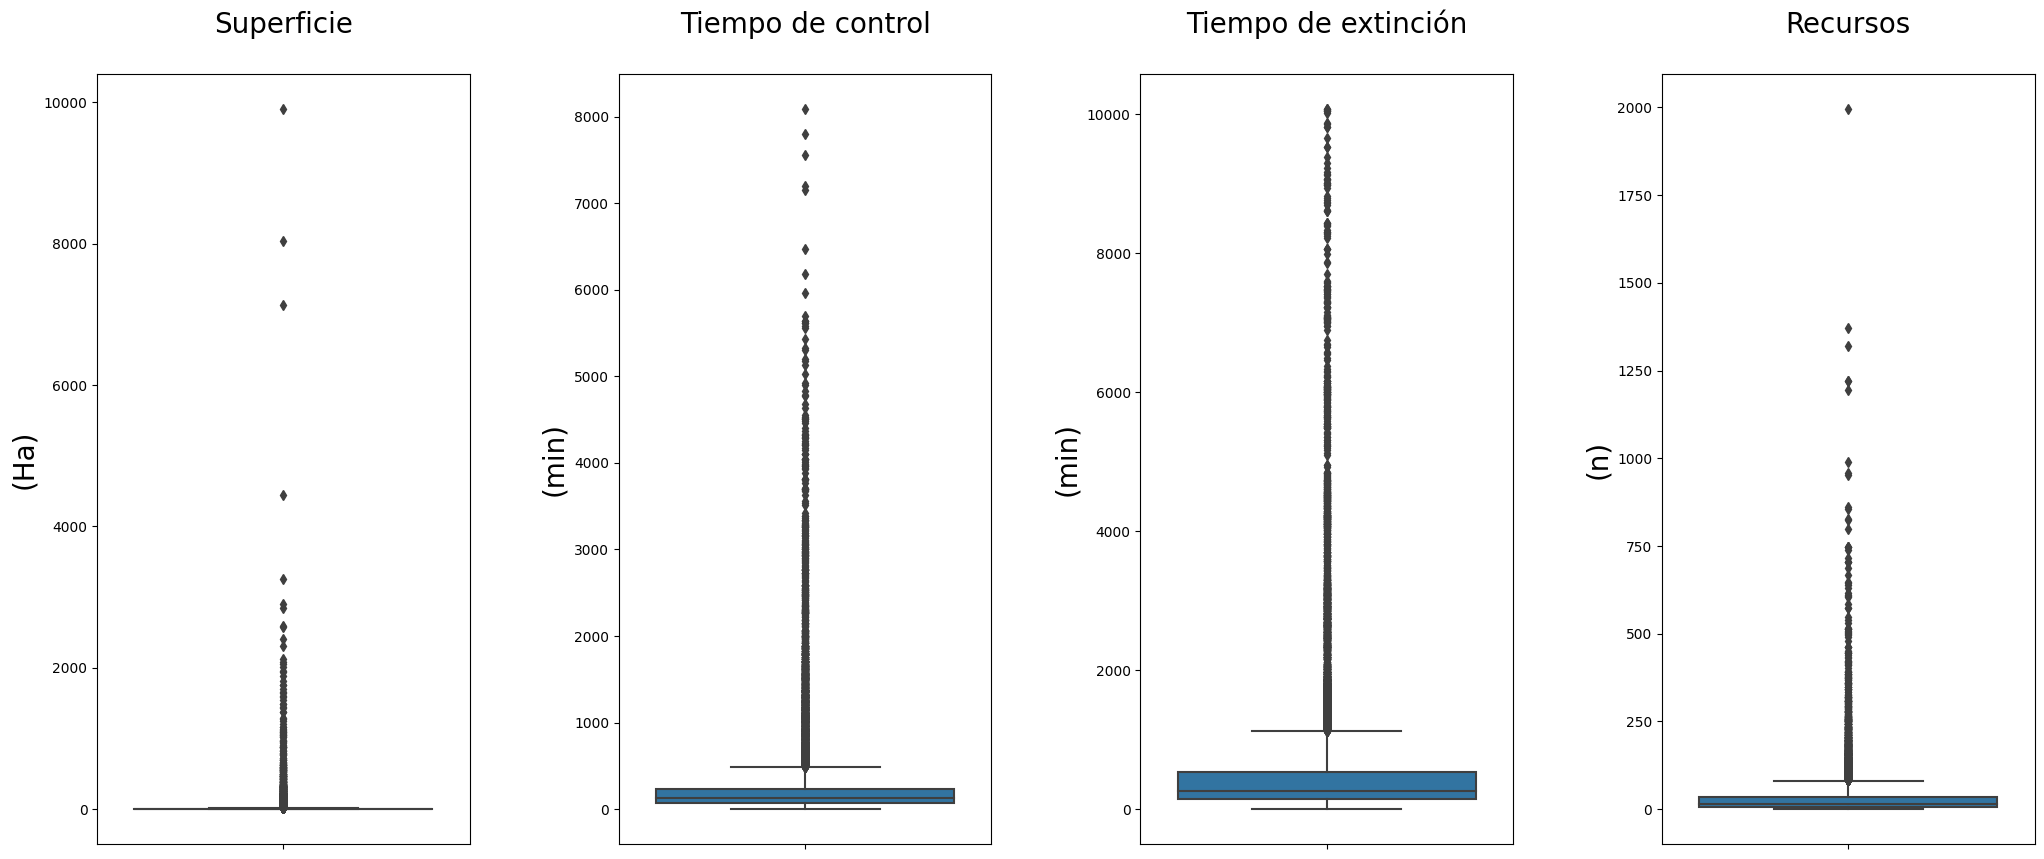

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(25, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
sns.boxplot(y = 'superficie', data = new_data, ax = ax1)
sns.boxplot(y = 'time_ctrl', data = new_data, ax = ax2)
sns.boxplot(y = 'time_ext', data = new_data, ax = ax3)
sns.boxplot(y = 'recursos', data = new_data, ax = ax4)

ax1.set_ylabel('(Ha)', fontsize = 20), ax1.set_title('Superficie\n', fontsize = 20)
ax2.set_ylabel('(min)', fontsize = 20), ax2.set_title('Tiempo de control\n', fontsize = 20)
ax3.set_ylabel('(min)', fontsize = 20), ax3.set_title('Tiempo de extinción\n', fontsize = 20)
ax4.set_ylabel('(n)', fontsize = 20), ax4.set_title('Recursos\n', fontsize = 20)
plt.show()

Although for each of these variables, there are a significant number of values above the third quartile, in some variables, a second group or (depending on the variable) individual is visibly even further away from the subset defined by the outliers. Another strategy would be to manually check (subjectively, based on the analyst's judgment) these values, ensuring that they are meaningful observations and not possible errors that occurred during measurement or data transcription. Considering that there are only four attributes with few observations within this range of extraordinarily high values, a manual approach is feasible:

In [16]:
new_data[['superficie', 'time_ctrl', 'time_ext', 'recursos']].corr(method = 'spearman')

,superficie,time_ctrl,time_ext,recursos
superficie,1.000000,0.459679,0.463786,0.251731
time_ctrl,0.459679,1.000000,0.675304,0.311135
time_ext,0.463786,0.675304,1.000000,0.477959
recursos,0.251731,0.311135,0.477959,1.000000


### Manual evaluation of the variable "area," checking for more evident outliers:

In [19]:
# To perform these checks, we will limit the number of columns to the following elements:
columns = ['superficie', 'fecha', 'Provincias', 'time_ctrl', 'time_ext', 'recursos']

# We will also create an empty list where we will add the indices of the observations that we consider as outliers
# for their subsequent treatment or removal
index_out = []

# We can establish a threshold from which to consult the dataframe. We can define this threshold based on the boxplots
# generated in the previous cells. In the case of area, this value will be 4000 Ha.
out_surf = new_data[new_data['superficie'] > 4000]
out_surf[columns]

,superficie,fecha,Provincias,time_ctrl,time_ext,recursos
24073,7136.60,2004-08-26,Jaén,1310,5480,703
29911,9901.47,2005-07-21,Cáceres,1738,9073,607
51481,4444.27,2009-07-14,Almería,2683,7033,478
68756,8037.14,2012-08-30,Málaga,4300,6550,1995


The values are coherent with fires occurring during the period of higher events (third quarter) in the southern half of the peninsula, and the relationship with the rest of the variables does not seem anomalous at first glance. Therefore, we will not discard any observations.

### Manual evaluation of the variable "control time," checking for more evident outliers:

In [20]:
# We can set a threshold beyond which to query the dataframe. We can define this threshold based on the boxplots
# generated in the previous cells. In the case of control time, this value will be 6000 minutes:
out_time_ctrl = new_data[new_data['time_ctrl'] > 6000]

In [21]:
out_time_ctrl[columnas]

,superficie,fecha,Provincias,time_ctrl,time_ext,recursos
44147,91.51,2007-03-08,Castellón/Castelló,7552,7603,98
53045,2301.30,2009-09-10,León,7203,8059,265
64160,770.00,2011-10-15,Ourense,6185,10060,321
69977,698.50,2012-03-26,Asturias,7802,7987,170
68356,45.00,2012-09-17,León,8087,8627,8
71827,1.10,2012-09-24,Valencia/València,6470,6675,28
81159,217.00,2015-12-20,Asturias,7156,9811,22


Two values (observations **71827** and **68356**) are inconsistent. The fire in Valencia had an extinguishing time of approximately 4.5 days (6675 minutes) to end a fire that affected only 1.1 Ha. On the other hand, the fire in León shows a relatively low relationship between extinguishing time and resources used. Considering that the affected area is far from the mean of this data sample, it will be considered an outlier (along with observation 71827).

In [22]:
index_out.extend([71827, 68356])

### Manual evaluation of the variable "extinguishing time," checking for more evident outliers:

In [23]:
# We can set a threshold beyond which to query the dataframe. We can define this threshold based on the boxplots
# generated in the previous cells. In the case of extinguishing time, this value will be 10000 minutes:
out_time_ext = new_data[new_data['time_ext'] > 10000]

In [24]:
out_time_ext[columnas]

,superficie,fecha,Provincias,time_ctrl,time_ext,recursos
60945,1957.17,2010-09-06,Valencia/València,5612,10052,1220
57220,554.89,2010-09-06,Alicante/Alacant,5612,10052,166
57212,99.02,2010-09-06,Alicante/Alacant,5635,10075,133
60944,373.42,2010-09-06,Valencia/València,5635,10075,1220
64160,770.00,2011-10-15,Ourense,6185,10060,321
81979,177.72,2015-12-19,Cantabria,958,10018,4


Considering the correlation between resources and extinguishing time, and given the significant difference in terms of the resource size of observation **81979** compared to the mean resources of this subset, as well as the time and region where it took place (cold period, northern half of the peninsula in a humid region for the month of December), we will add this observation to the list of outliers.

In [25]:
index_out.append(81979)

### Manual evaluation of the variable "resources," checking for more evident outliers:

In [26]:
# We can set a threshold beyond which to query the dataframe. We can define this threshold based on the boxplots
# generated in the previous cells. In the case of resources, this value will be 1000 units:
out_recursos = new_data[new_data['recursos'] > 1000]

In [27]:
out_recursos[columnas]

,superficie,fecha,Provincias,time_ctrl,time_ext,recursos
8864,1879.91,2002-11-09,Granada,3345,5865,1194
60945,1957.17,2010-09-06,Valencia/València,5612,10052,1220
60944,373.42,2010-09-06,Valencia/València,5635,10075,1220
68690,325.93,2012-07-12,Madrid,446,4829,1319
68756,8037.14,2012-08-30,Málaga,4300,6550,1995
75812,168.97,2014-07-20,Castellón/Castelló,1782,6072,1371


From the perspective of resources, we will not add observations to the list of outliers.

Given the low number of outliers we have found, these records can be removed from the dataset without negatively impacting the model:

In [28]:
index_out

[71827, 68356, 81979]

In [29]:
new_data = new_data[~new_data['class_per_time'].isin(index_out)]

## Feature Engineer

After preprocessing, where we made decisions to remove certain time segments associated with fire duration and some isolated observations with significant impact on the distributions of numerical variables, there still remains a large number of outliers with a significant impact on the distributions of these data:

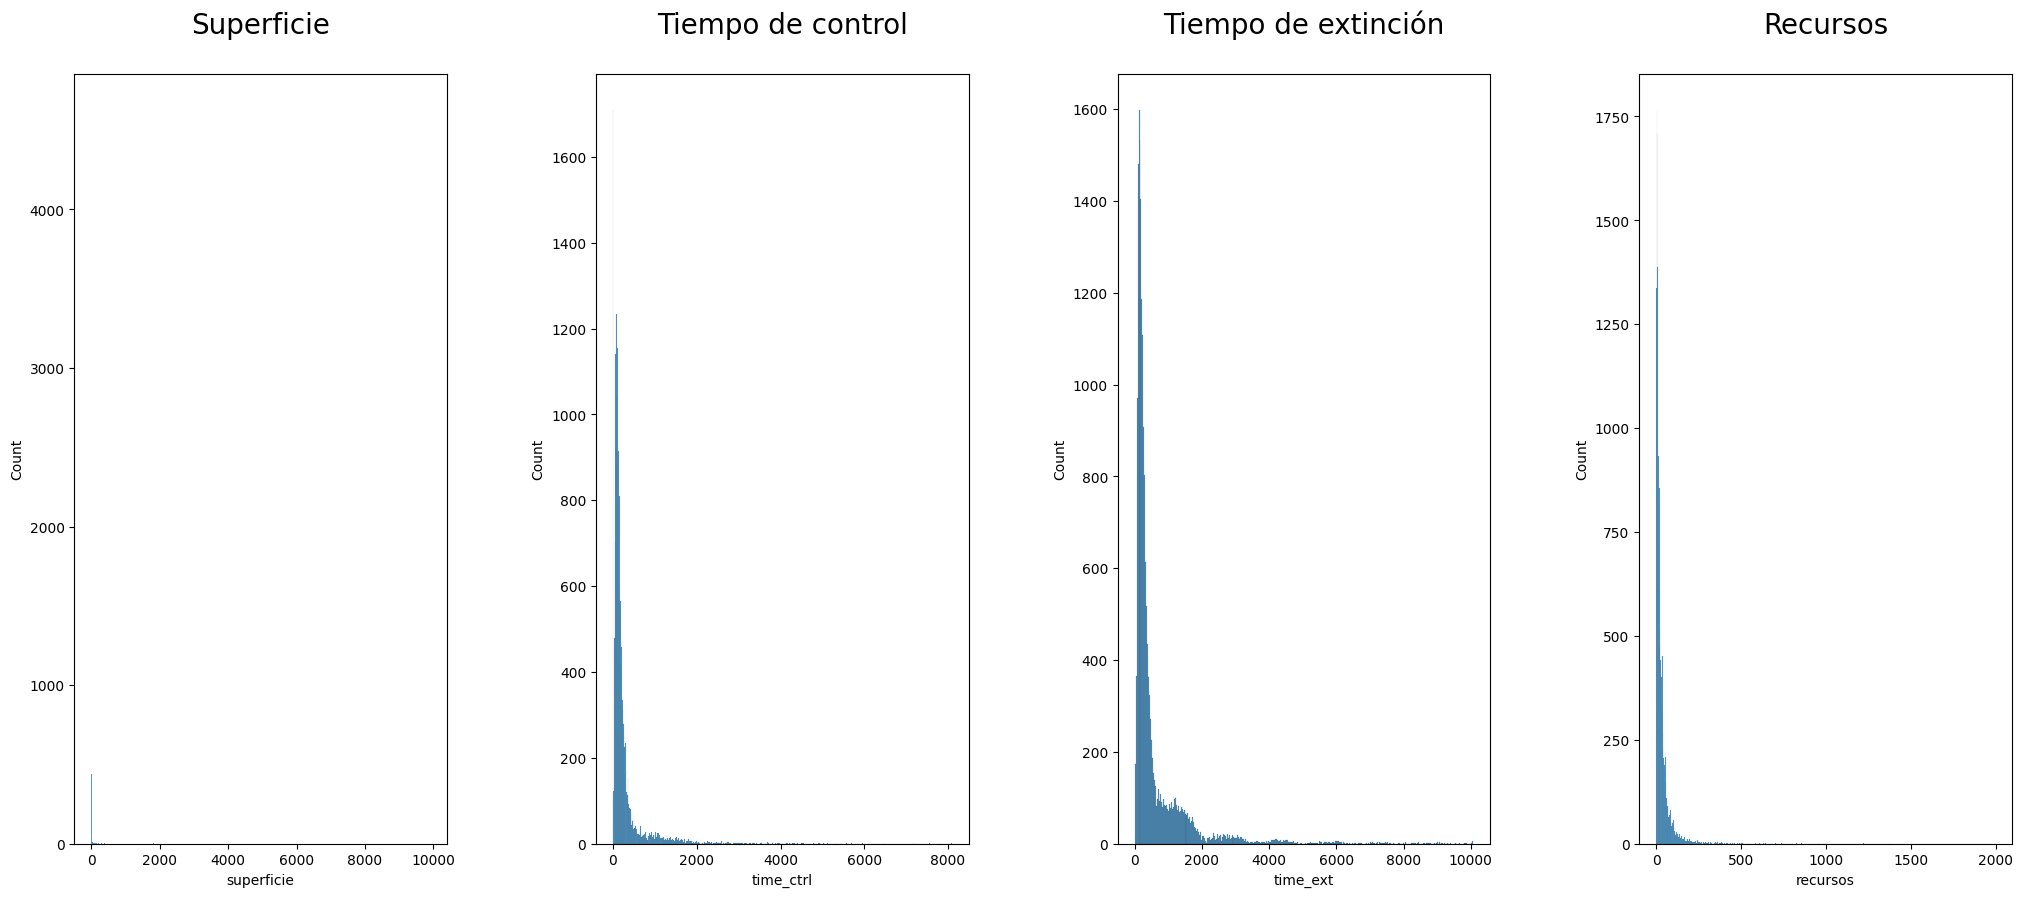

In [30]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(25, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
sns.histplot(x = 'superficie', data = new_data, ax = ax1)
sns.histplot(x = 'time_ctrl', data = new_data, ax = ax2)
sns.histplot(x = 'time_ext', data = new_data, ax = ax3)
sns.histplot(x = 'recursos', data = new_data, ax = ax4)

ax1.set_title('Superficie\n', fontsize = 20)
ax2.set_title('Tiempo de control\n', fontsize = 20)
ax3.set_title('Tiempo de extinción\n', fontsize = 20)
ax4.set_title('Recursos\n', fontsize = 20)
plt.show()

The observed symmetry in normal distributions is typically a desirable requirement regardless of the models we are using for predictions. Models that assume some form of distribution over the data are called parametric models (general linear models, logistic regression, etc.). These models summarize data using a fixed set of parameters (such as mean and standard deviation), regardless of the size of the training set. Within the context of machine learning, there are other non-parametric alternatives (decision trees or unsupervised learning techniques like K-means) that are not biased by distribution effects or limited by assumptions inherent to parametric models.

There are other methods that we could employ to filter the dataset in search of outlier values (such as fitting linear models and comparing residuals to fitted values to identify points with larger deviations, dimensionality reduction combined with clustering models, etc.). However, considering that we want to retain as much data as possible from the sample obtained in the previous filtrations, there are other alternatives that could help to *'repair'* the lack of normality in our data (or at least bring it closer to a normal geometry):

   * Generating new variables from linear or non-linear combinations of the original variable set.
   * Directly transforming each of the variables.

On numerous occasions, the synthetic creation of variables from the dataset can generate highly useful attributes for building our model. In our case, we can generate a new variable that explains the effective extinguishing time dedicated per hectare during a fire:

$$Extinction_{efficiency} = \frac{t_{extinguishing} - t_{control}}{area} (\text{min/Ha})$$

Similarly to how we did with efficiency, we can reformulate the variable "resources" as resources per hectare. This way, we will transition from having a discrete numerical variable to a continuous numerical variable:

$$Resources_{area} = \frac{resources}{area} (\text{resources/Ha})$$

In [31]:
ef = (new_data['time_ext']-new_data['time_ctrl'])/new_data['superficie']
res = (new_data['recursos']/new_data['superficie'])

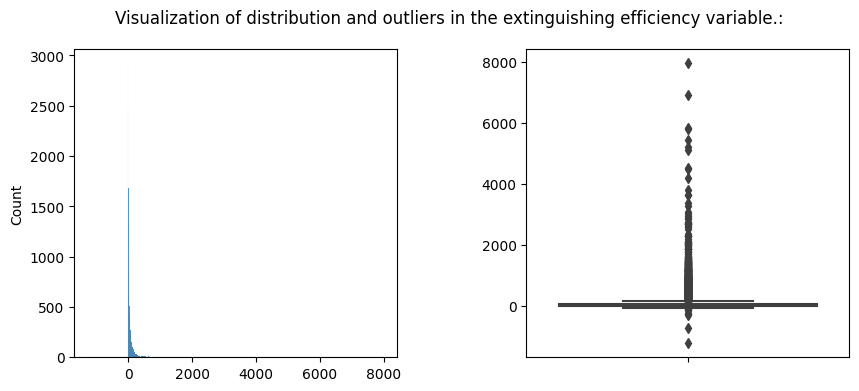

In [33]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
sns.histplot(x = ef, ax = ax1)
sns.boxplot(y = ef, ax = ax2)
fig.suptitle('Visualization of distribution and outliers in the extinguishing efficiency variable.:')
plt.show()

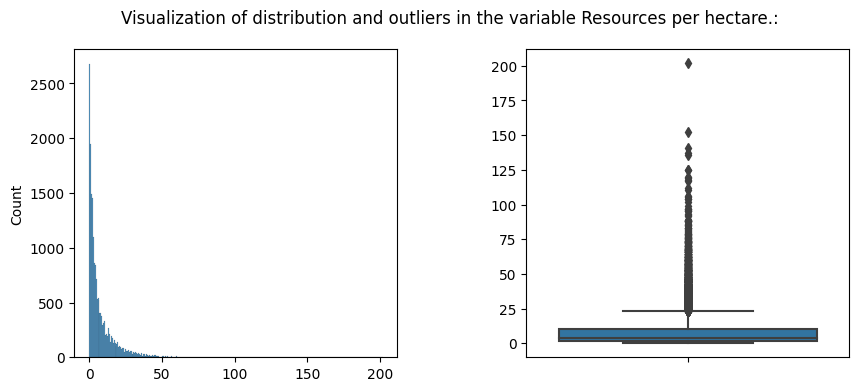

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
sns.histplot(x = res, ax = ax1)
sns.boxplot(y = res, ax = ax2)
fig.suptitle('Visualization of distribution and outliers in the variable Resources per hectare.:')
plt.show()

**Some important considerations about the new variables:**

   1. According to the database from which they were extracted, the control time **by definition** is less than the extinguishing time and should be a positive value different from 0 (according to protocol, both control time and extinguishing time should exist). In the upper graph, we can see negative values as a result of the operation $t_{extinguishing} - t_{control}$, which is likely due to an error during data transcription.
   
   
   2. Just like the efficiency variable, no numerical variable (area, control time, extinguishing time, and resources) should have a value of 0 in any record. For each fire, there is an extinguishing time, a control time, and resources mobilized (however small they may be; there will always be personnel or equipment involved in the firefighting process, regardless of the fire's scale of danger).
   
   
   3. Imputation techniques will not be applied to replace erroneous records. These data points will be removed from the dataset.

In [35]:
index = new_data['time_ext'].index.tolist()
time_ctrl = new_data['time_ctrl'].tolist()
rec = new_data['recursos'].tolist()
wrong_data = []
for i , v in enumerate(new_data['time_ext'].tolist()):
    ext = v 
    ctrl = time_ctrl[i]
    val = ext-ctrl
    recurso = rec[i]
    if val <= 0 or ctrl <= 0 or recurso <= 0:
        wrong_data.append(index[i])
print(len(wrong_data))

2310


In [36]:
new_data = new_data[~new_data.index.isin(wrong_data)]

In [38]:
new_data['Eficiencia'] = (new_data['time_ext']-new_data['time_ctrl'])/new_data['superficie']
new_data['Recursos_ha'] = (new_data['recursos']/new_data['superficie'])

## Saving data

In [39]:
#Datos filtrados 
# new_data.to_csv('../Data/generated_files/final_model_data.csv')